In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Get the dataset

In [3]:
columns_name =['user_id','item_id','rating','timestamp']

In [4]:
df = pd.read_csv("ml-100k/u.data",sep ='\t',names=columns_name)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df.shape

(100000, 4)

In [7]:
#to check how many unique users are there
df['user_id'].nunique()

943

In [8]:
#to check how many unique movies are there
df['item_id'].nunique()

1682

In [9]:
movies_titles = pd.read_csv("ml-100k/u.item",sep ='\|',header =None , encoding= 'unicode_escape')

In [10]:
movies_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
movies_titles = movies_titles[[0,1]]

In [12]:
movies_titles

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [13]:
movies_titles.shape

(1682, 2)

In [14]:
movies_titles.columns = ['item_id','movie_title']

In [15]:
movies_titles.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
#merge the two dataframe together

df = pd.merge(df,movies_titles,on='item_id')

In [17]:
df.head()

,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [18]:
df.tail()

,user_id,item_id,rating,timestamp,movie_title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# Exploratory data analysis

In [19]:
df.groupby("movie_title").mean()['rating'].sort_values(ascending=False)

movie_title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [20]:
df.groupby('movie_title').count()['rating'].sort_values(ascending=False)

movie_title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [21]:
ratings = pd.DataFrame(df.groupby("movie_title").mean()['rating'])

In [22]:
ratings['no_of_ratings'] = pd.DataFrame(df.groupby('movie_title').count()['rating'])

In [23]:
ratings

,rating,no_of_ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [24]:
ratings.sort_values(by='rating',ascending=False)

,rating,no_of_ratings
movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

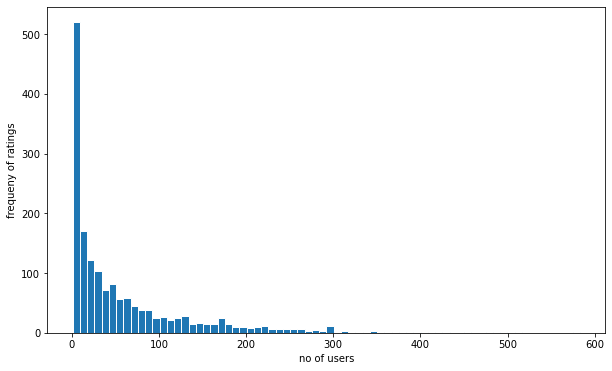

In [26]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no_of_ratings'],bins=70,edgecolor='white')
plt.xlabel('no of users')
plt.ylabel('frequeny of ratings')
plt.show()

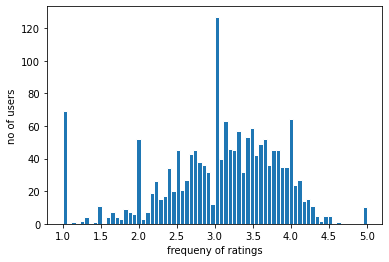

In [27]:
plt.hist(ratings['rating'],bins=70,edgecolor='white')
plt.ylabel('no of users')
plt.xlabel('frequeny of ratings')
plt.show()

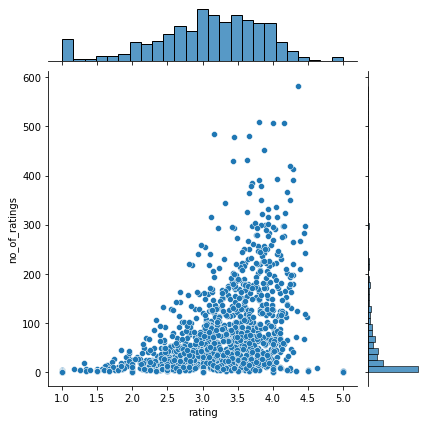

In [28]:
sns.jointplot(x='rating',y='no_of_ratings',data=ratings)

# Creating Movie Recommedation

In [31]:
movie_matrix = df.pivot_table(index='user_id',columns ='movie_title',values='rating')

In [32]:
movie_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [33]:
ratings.sort_values('no_of_ratings',ascending=False)
# we are checking which movie is most rated by most no of users

,rating,no_of_ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [36]:
starwars_user_ratings = movie_matrix['Star Wars (1977)'] #checking which user given what rating to starwars

In [37]:
starwars_user_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [38]:
similar_to_Starwars = movie_matrix.corrwith(starwars_user_ratings)

In [39]:
similar_to_Starwars

movie_title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [40]:
#conerting this to dataframe
corr_starwars = pd.DataFrame(similar_to_Starwars,columns=['coorelation'])

In [41]:
corr_starwars

,coorelation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [42]:
#removing nan vqlues
corr_starwars.dropna(inplace=True)

In [43]:
corr_starwars

,coorelation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [44]:
corr_starwars.head()

,coorelation
movie_title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [47]:
corr_starwars = corr_starwars.join(ratings['no_of_ratings'])
corr_starwars.head()

,coorelation,no_of_ratings
movie_title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [49]:
corr_starwars[corr_starwars['no_of_ratings']>100].sort_values('coorelation',ascending=False)


,coorelation,no_of_ratings
movie_title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Function

In [61]:
def predict_movie(movie_name):
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['coorelation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['no_of_ratings'])
    
    predictions =corr_movie[corr_movie['no_of_ratings']>100].sort_values('coorelation',ascending=False)
    
    
    return predictions

In [62]:
predict_movie('Return of the Jedi (1983)')

,coorelation,no_of_ratings
movie_title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,367
Star Wars (1977),0.672556,583
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
...,...,...
Brazil (1985),-0.111670,208
Lost Highway (1997),-0.112456,125
Annie Hall (1977),-0.116004,180
